In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:

data = fetch_california_housing()
X = data.data
y = data.target.reshape(-1, 1)

In [5]:

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:

n_features = X.shape[1]
weights = np.random.randn(n_features, 1) * 0.01
bias = np.zeros(1)
learning_rate = 0.01
epochs = 100
losses = []

In [7]:

for epoch in range(epochs):

    y_pred = np.dot(X_train, weights) + bias
    loss = np.mean((y_pred - y_train)**2)
    losses.append(loss)
    
    error = y_pred - y_train
    grad_weights = np.dot(X_train.T, error) / len(X_train)
    grad_bias = np.mean(error)
    
    weights -= learning_rate * grad_weights
    bias -= learning_rate * grad_bias

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 5.6594
Epoch 10, Loss: 4.7390
Epoch 20, Loss: 3.9883
Epoch 30, Loss: 3.3755
Epoch 40, Loss: 2.8752
Epoch 50, Loss: 2.4664
Epoch 60, Loss: 2.1324
Epoch 70, Loss: 1.8592
Epoch 80, Loss: 1.6357
Epoch 90, Loss: 1.4527


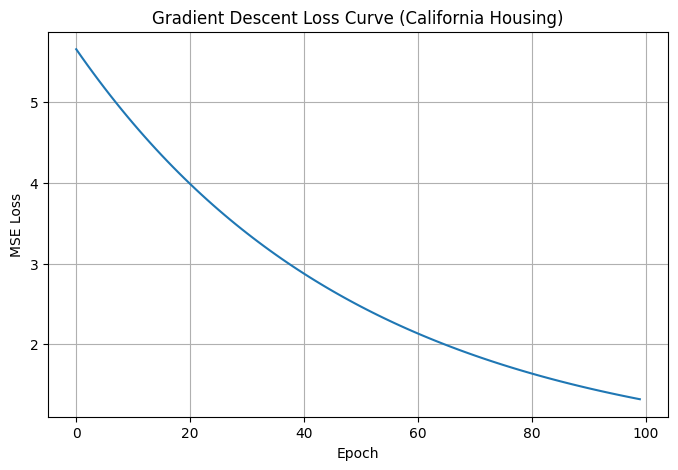

In [8]:

plt.figure(figsize=(8, 5))
plt.plot(losses)
plt.title('Gradient Descent Loss Curve (California Housing)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()

In [9]:

test_pred = np.dot(X_test, weights) + bias
results = pd.DataFrame({
    'Actual': y_test.flatten(), 
    'Predicted': test_pred.flatten(),
    'Difference': (y_test.flatten() - test_pred.flatten())
}).head(10)

print("\nFirst 10 Test Predictions:")
print(results.round(4))


First 10 Test Predictions:
   Actual  Predicted  Difference
0   0.477     0.6449     -0.1679
1   0.458     0.9766     -0.5186
2   5.000     1.3303      3.6698
3   2.186     1.7758      0.4102
4   2.780     1.3539      1.4261
5   1.587     1.4212      0.1658
6   1.982     1.7475      0.2345
7   1.575     1.3667      0.2083
8   3.400     1.3311      2.0689
9   4.466     2.6218      1.8442


In [10]:

final_loss = np.mean((test_pred - y_test)**2)
print(f"\nFinal Test MSE: {final_loss:.4f}")
print(f"Final Weights: {[round(w[0], 4) for w in weights]}")
print(f"Final Bias: {bias[0]:.4f}")


Final Test MSE: 1.2959
Final Weights: [np.float64(0.4953), np.float64(0.0956), np.float64(0.067), np.float64(-0.0397), np.float64(-0.0056), np.float64(-0.0201), np.float64(-0.1091), np.float64(-0.0667)]
Final Bias: 1.3126
